# Gapminder DataSet

The given data set is obtained from the gapminder website, which includes the statistics round the globe. The dataset is for the 19 century life expectancy acroos different countries.

The goal of the exercise is to have a clean data set, with

### - Drop the unneccessary columns with all NaNs adding no value to our project.
### - Drop the duplicate information
### - Prepare the data in tidy format, with no missing values.
### - Appropriate data types should be used for each column
### - Assert the assumptions and save the clean file


#### Step 1:

1) Import the dataset using pd.read_csv(filename)

2) Drop the 'Unnamed: 0' column using df.drop(columns=column_name, inplace=True)

In [220]:
# 1) Import the dataset using pd.read_csv(filename)

import pandas as pd

data=pd.read_csv('gapminder.csv')
data.tail(2)


,Unnamed: 0,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Life expectancy
778,258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Åland
779,259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.6,55.8,56.0,55.9,56.0,56.0,56.1,56.1,56.1,South Sudan


In [221]:
# 2) Drop the 'Unnamed: 0' column using df.drop(columns=column_name, inplace=True)

data.drop(columns='Unnamed: 0', inplace=True)
data.head(2)

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Life expectancy
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia
1,28.21,28.2,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan


# Step 2: Exploratory analysis

Whenever you obtain a new dataset, your first task should always be to do some exploratory analysis to get a better understanding of the data and diagnose it for any potential issues.

The Gapminder data for the 19th century has been loaded into a DataFrame called data. 

1) Check the header and footer information about the data using .head(), .tail()

2) Check the column names, index, and shape of the data using .columns, .index, .shape

3) Find the descriptive statistics of the data using .describe() method. 

4) Also, find the information about columntypes, memory usage etc. using .info() method.

5)  Create two dimensional scatter plot comparing life expectancy in 1800 and 1900


In [12]:
data.head(2)
data.tail(2)
data.columns
data.index
data.shape
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Columns: 219 entries, Unnamed: 0 to Life expectancy
dtypes: float64(217), int64(1), object(1)
memory usage: 1.3+ MB


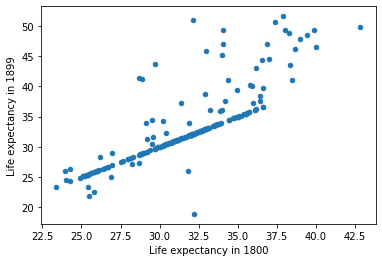

In [222]:
# 5)  Create two dimensional scatter plot comparing life expectancy in 1800 and 1900

import matplotlib.pyplot as plt

# 1)

data.plot(kind='scatter', x='1800', y='1899')

plt.xlabel('Life expectancy in 1800')
plt.ylabel('Life expectancy in 1899')
plt.show()

# Step 3: Drop the duplicate information

1) Make Life expectancy as the first column of the dataframe

2) Drop duplicate rows using df.drop_duplicates() method.

3) The country name is supposed to occur only once, so remove the multiple entries.
    
    a) Check the .value_counts() for the categorical variable 'Life expectancy'
    
    b) Drop the extra rows containing the same country information. Use .drop_duplicate(subset='column', keep='first')

4) Drop the columns containing all NaN values. Use .dropna(how='all', axis=1)

In [223]:
# 1) Life expectancy as the first column

a=data.columns.to_list()
imp = a.pop()
a.insert(0,imp)

In [224]:
new_list=a
data=data[new_list]
data.columns

Index(['Life expectancy', '1800', '1801', '1802', '1803', '1804', '1805',
       '1806', '1807', '1808',
       ...
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016'],
      dtype='object', length=218)

In [235]:
# 2) Drop duplicate rows

data1=data.drop_duplicates()

data1['Life expectancy'].value_counts()

print(data.shape)
print(data1.shape)

(780, 218)
(679, 218)


In [234]:
# 3) Drop duplicate country rows

data2=data1.drop_duplicates(subset='Life expectancy', keep='first')
data2.shape

(260, 218)

In [243]:
# 4) Drop columns containing all NaN values

data3=data2.dropna(how='all', axis=1)

print(data2.shape)
print(data3.shape)

data3.head(5)

(260, 218)
(260, 101)


,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,27.29,27.28,27.27,27.26,27.25,27.24,27.23,27.22,27.21,27.20
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82


# Step 4: Prepare the data in tidy format

1) Convert the data in tidy format. Reshape the data using pd.melt

2) Check data types of columns using df.dtypes

3) Convert the columns into appropriate datatypes using .astype or pd.to_numeric methods.

In [244]:
# 1) Reshaping dataset using pd.melt

gap_melt=pd.melt(frame=data3, id_vars='Life expectancy')

gap_melt.columns=['Country', 'Year', 'Life expectancy']

gap_melt.head()

,Country,Year,Life expectancy
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.21
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.40
4,Algeria,1800,28.82


In [246]:
# 2) Check data types of columns using df.dtypes

gap_melt.dtypes

gap_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26000 entries, 0 to 25999
Data columns (total 3 columns):
Country            26000 non-null object
Year               26000 non-null object
Life expectancy    20100 non-null float64
dtypes: float64(1), object(2)
memory usage: 609.5+ KB


In [247]:
# 3) Convert the columns into appropriate datatypes using .astype or pd.to_numeric methods.

gap_melt['Country'] = gap_melt.Country.astype('category')

gap_melt['Year'] = gap_melt.Year.astype('int64')

gap_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26000 entries, 0 to 25999
Data columns (total 3 columns):
Country            26000 non-null category
Year               26000 non-null int64
Life expectancy    20100 non-null float64
dtypes: category(1), float64(1), int64(1)
memory usage: 469.2 KB


# Step 5: Asserting the assumptions and saving the file

1) Assert that there are no nulls in each column. Use assert statement

2) Drop any NaN values if there is an assertion error

3) Check the shape, .info() of the final data set

4) Save the file with name 'clean_gapminder.csv'. Use to_csv() method.

In [253]:
assert gap_melt['Country'].notnull().all()

assert gap_melt['Year'].notnull().all()

assert gap_melt['Life expectancy'].notnull().all()

AssertionError: 

In [256]:
# Drop the rows containing any null value in the 

gap_melt.dropna(how='any', axis=0, inplace=True)

In [258]:
gap_melt.shape
gap_melt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20100 entries, 1 to 25999
Data columns (total 3 columns):
Country            20100 non-null category
Year               20100 non-null int64
Life expectancy    20100 non-null float64
dtypes: category(1), float64(1), int64(1)
memory usage: 522.4 KB


In [259]:
# 4) Save the file with name 'clean_gapminder.csv'. Use to_csv() method.

gap_melt.to_csv('clean_gapminder.csv')

In [50]:
import os
os.chdir(r'C:\Users\user\Desktop\DS - Course\File - 6')